# Th0Th - a complex example with known heterogeneity
-------
Moseley et al. (2015) present U-Th analyses from a Holocene age speleothem. Moseley et al. (2015) note four distinct growth regions and perform isochron analysis to establish (230Th/232Th)A0 for each. The authors report a range of values from ~3 to ~25 with each layer have a distinct value - ~3, 11, 18, and 25. 
This present an interesting case for the applicability of Th0Th to such a complex case with know heterogeniety. However, with the model design to produce some non-parameteric distribution, the ability to handle complex multi-modal cases is in-built. We do not separate this data by distinct growth interval but consider it a complete system to test if IBIS can detect potentially mulitple phases with varying (230Th/232Th)A0. 



#### References

Moseley, G.E., Richards, D.A., Smart, P.L., Standish, C.D., Hoffmann, D.L., ten Hove, H. and Vinn, O., 2015. Early–middle Holocene relative sea-level oscillation events recorded in a submerged speleothem from the Yucatán Peninsula, Mexico. The Holocene, 25(9), pp.1511-1521.

In [98]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
import pandas as pd
import glob
import os 
mpl.rcParams['font.size'] = 12


In [99]:
def Get_Prior_Data(file_pattern, target_directory = f'{filepath}/Initial Thorium '): 
    file_pattern = os.path.join(target_directory, file_pattern)
    pickle_files = glob.glob(file_pattern)
    N = len(pickle_files)
    data = []
    for file_path in pickle_files:
        try:
            with open(file_path, 'rb') as f:
                data.append(pickle.load(f))
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return data

In [100]:
data_faraji2021 = Get_Prior_Data("Moseley_2015_IBIS_All_prior")


In [101]:
# Moseley et al. (2015) data
x_ = np.array([3.1, 18.5, 11.9, 24.4])
x_err = np.array([6.2, 5.4, 2.2, 5.6])

# IBIS
------
A study in heterogeneity. 
IBIS produces a multi-modal distribution capturing the most likely ranges of (230Th/232Th)A0 inferred by the isochron apporach of Moseley et al. (2015). 
There is a lower peak, an intermediate, then a large value peak. These seem to do a resonable job of reflecting the isochron value highlighting the flexibility of this model approach. 
Secondly, this highlights the need to step away from a standard approach of bulk-earth corrections. In the best case this would be capture in the lower peak but subsequently there are ~30 times difference between IBIS ouputs as well as the Moseley et al. (2015) isochron. 


Why the variability?
--------------------
This is a good follow-up question. Also why is there a seemingly larger variability in (230Th/232Th)A0 in tropic regions? Is it climate related? Is it tracking something? 

Text(0, 0.5, 'Density')

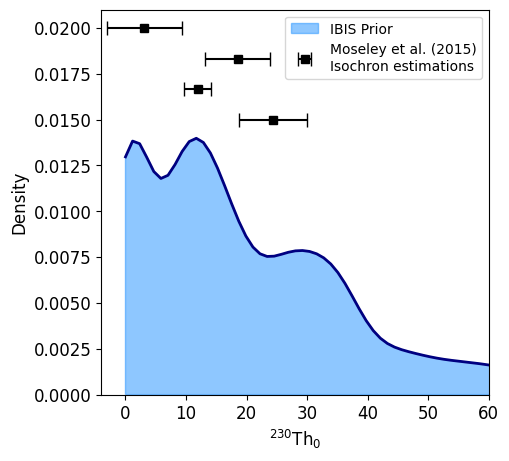

In [102]:
fig, ax = plt.subplots(1, 1, figsize = (5,5))
ax.plot(data_faraji2021[0].x, data_faraji2021[0].y/2, color = 'navy', lw = 2)
ax.fill_between(data_faraji2021[0].x, data_faraji2021[0].y/2, color = 'dodgerblue', alpha = 0.5, 
                   label = 'IBIS Prior')
ax.set_xlim(-4, 60)
for i in range(len(x_)): 
    ax.errorbar(y = np.linspace(0.02, 0.015, len(x_))[i], x = x_[i], xerr = x_err[i], 
               fmt = 's', capsize = 5, color = 'k', 
               label = 'Moseley et al. (2015)\nIsochron estimations'if i == 0 else None)
ax.legend(fontsize = 10)
ax.set_ylim(bottom = 0.0)
ax.set_xlabel('$^{230}$Th$_{0}$')
ax.set_ylabel('Density')
